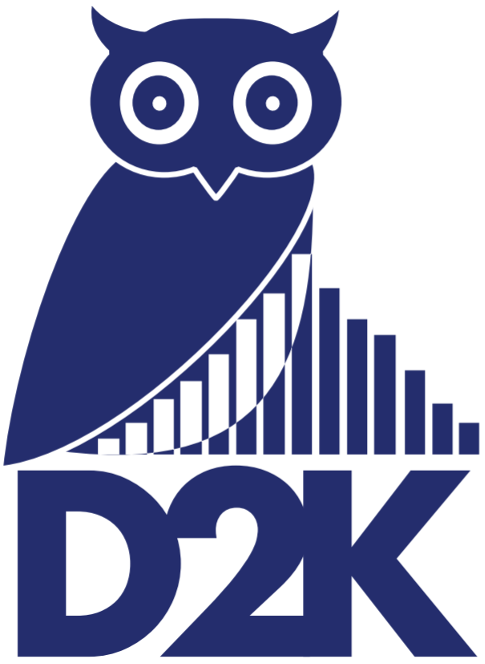 

<center>

# Welcome to DSCI 101 #
### Introduction to Data Science ###

### Code Demo for Week 10 ###

# Testing Hypothesis #

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['patch.force_edgecolor'] = True
import seaborn as sns

import random
random.seed(2024)

## Swain vs. Alabama ##
- **Null hypothesis**: the jury panel is a random sample from the county population, i.e. proportion of blacks should be "similar" to county population.
- **Alternative hypothesis**: no, there are too few blacks on the jury panel.

Python functions we will use in this demo:
- [`np.random.binomial`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html)
    - a binomial distribution can simulate the count of success out of repeated Bernoulli trials.
    - need 2 parameters: number of trials $n$, success probability of single Bernoulli trial $p$
- [`np.random.permutation`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html)
    - randomly shuffle a list of values (like shuffle a deck of cards)

In [ ]:
### define some parameters
# population proportion of blacks is 26%
pop_p = ...
# 8 black on a 100 people panel
obs_stat = ...
# sample size is 100 (number of jury panel)
sample_size = ...

In [ ]:
### simulate the test stat under the null
# if 100 jury panel was indeed randomly selected
# how many blacks could there be?
np.random.binomial(n=..., p=...)

In [ ]:
### simulate sampling distribution of test stat under the null
simu_stats = []
# rep is the number of samples to draw from population, the more the better
rep = 10000

for i in np.arange(rep):
    # draw simu_stat from binomial distribution
    one_simu_stat = ...
    # use np.append to save to the list of simu_stats
    simu_stats = ...
    
# what does each number of simu_stats represent?    
simu_stats

In [ ]:
### visualize the sampling distribution under the null
plt.hist(simu_stats, bins=30)
# plot the observed stat as one point
plt.scatter(obs_stat, 100, color='red', s=100, label='observed stat')
plt.title('sampling distribution of test stat')
plt.xlabel('simulated stat values')
plt.legend();

In [ ]:
# the proportion of simu_stats that is smaller than obs_stat
# why smaller? the direction to support alternative hypothesis
# calculate proportion using np.average: the proportion of Trues
# this is using Monte Carlo Approx to calculate a probability
p_value = ...
p_value

In [ ]:
# the cut_off is the 5th percentile of the simu_stat
# use np.percentile function
# why 5th percentile? direction to support alternative: left tail!
cut_off = ...
cut_off

In [ ]:
### visualize the sampling distribution under the null
plt.hist(simu_stats, bins=30, alpha=0.5)
# plot the cut-off value as a vertical line
plt.axvline(x=cut_off, color='yellow', label='cut-off')
plt.scatter(obs_stat, 50, color='red', s=100, label='observed stat')
plt.title('sampling distribution of test stat')
plt.xlabel('simulated stat values')
plt.legend();

## Student's lament ##

STAT 101 at Uiv X is a very large class serving many majors. Students enrolled in this course are randomly divided into multiple sections, and each section is taught by a PhD student instructor using the exactly the same course material developed by faculty.  

- For a particular semester, there are 12 sections, with each section having about 30 students. 
- After the midterm exam, we look at grade distribution and comparing sections, and noticed section 3 has a lowest average grade 13.7, while the overall average is 15.5. (The midterm is 25 multiple choices so the score is out of 25.)
- Because the students were randomly assigned to the sections, we would expect them to have similar average.

- **What are the hypotheses to anwser this question?**
- **What is your plan to conduct this hypothesis testing?**

In [ ]:
# dataframe with 2 columns: section number and midterm score
scores = pd.read_csv('scores_by_section.csv')
scores

In [ ]:
# calculate number of students in each section
...

In [ ]:
# calculate average midterm grades in each section
...


In [ ]:
# what is obs_stat in this case?
obs_stat = ...
obs_stat

In [ ]:
sim_stats = []
rep = 10000

...

In [ ]:
# p_value: 
p_value = ...
# cut off:
cut_off = ...
print('observed statistic: ', obs_stat)
print('cut-off simulated statistic: ', cut_off)
print('P_value: ', p_value)

In [ ]:
# plot histogram of simulated 10000 averages
# compare to one observed average: the true average for section 3
plt.hist(sim_stats, bins=30, alpha=0.5)
plt.axvline(x=cut_off, color='yellow', label='cut-off')
plt.scatter(obs_stat, 50, color='red', s=100, label='Section 3 Midterm Avg')
plt.title('Sampling distribution of average midterm score')
plt.xlabel('Simulated midterm avg for a section')
plt.legend();

## Permutation Test #

### Birth weights

- **Null hypothesis**: the average newborn weights from smoker and non-smoker mothers are the same. 
- **Alternative hypothesis**: no, the average newborn weights from smoker mothers are lighter compared to non-smoker mothers. 

### Idea of permutation test:
If the two groups are from the same population distribution, it is like the two groups were randomly assigned. Therefore, we are going to randomly reassign the two groups and see how different they can be. This can be done by:
- randomly shuffle the group labels (or shuffle the actual measurement, which is equivelant).
- in this case, it is as if we are going to randomly assign the babies to the mothers, then calculate difference of average baby weights based on mothers' smoking status. 

In [ ]:
# we have seen this data set before
baby = pd.read_csv('baby.csv')
baby

**Practice:**
- take out the two columns related to our hypothesis test, and save it as a new dataframe named `smoking_and_birthweight`.
- use your new dataframe to create a visualization to compare newborn weights for smoker and non-smoker mothers.
- calculate average newborn weights of smoker and non-smoker mothers, and the difference between two groups (let's do non-smoker minus smoker), and save it as `obs_diff`.

In [ ]:
### your code here
...

In [ ]:
### your code here
...

In [ ]:
# check the value of obs_diff
obs_diff

**Practice:**
- From `smoking_and_birthweight` take out column smoking status, apply [`np.random.permutation`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html) and save as `shuffled_smoking`.
- Combine `shuffled_smoking` with newborn weights column in `smoking_and_birthweight`, and create a new dataframe named `shuffled_df`.
- Using `shuffled_df`, calculate average newborn weights of "smoker" and "non-smoker" mothers, and the difference between two groups (let's do non-smoker minus smoker) again, and save it as `one_sim_diff`.

In [ ]:
### your code here
...

In [ ]:
# check the value of one_sim_diff
one_sim_diff

**Practice:**
- Now put all together to repeat this 10000 times!
- Start an empty list `sim_diffs` to save a sim_diff from each loop:
    - inside the loop, you should repeat all the above steps to calculate one sim_diff: shuffle - combine - group - subtract
- What do you expect to see in sim_diffs when the loop is done?

In [ ]:
### your code here
# put all together to repeat many times for the permutation test
sim_diffs = []
rep = 10000
...

In [ ]:
### plot your sim_dffs in a histogram
plt.hist(sim_diffs, bins=30)
plt.scatter(obs_diff, 50, color = 'red', s=100, label='observed diff')
plt.title('sampling distribution of test stat')
plt.xlabel('diffence between group means (non-smoker minus smoker)')
plt.legend();

In [ ]:
# what is p_value? think about the alternative hypothesis!
p_value = ...
# what is the cut_off values? same direction as the p_value
cut_off = ...

In [ ]:
### plot your sim_dffs in a histogram
### together with obs_diff and cut-off values
plt.hist(sim_diffs, bins=30, alpha=0.5)
plt.axvline(x=cut_off, color='yellow', label='cut off')
plt.scatter(obs_diff, 50, color = 'red', s=100, label='observed diff')
plt.title('Permutation test for newborn weights maternal smoking status')
plt.xlabel('diffence between group means (non-smoker minus smoker)')
plt.legend();

**Practice:**

Carry out the hypothesis testing using permutation.

- **Null hypothesis**: the mothers' pregnancy weight and their newborn weights are NOT correlated.
- **Alternative hypothesis**: no, the mothers' pregnancy weight and their newborn weights are positively correlated: higher pregnancy weights means higher newborn weights on average. 

**Practice:**
- take out the two columns we want to work with and save as a new df `mother_baby_weight`.
- create a visualization to explore the relation between mother's weights and newborn weights.

In [ ]:
### your code here
...

To calculate correlation coefficient between two numerical variables, you can use [`df.corr`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html). See example code below.

In [ ]:
# example code for calculate correlation coef
# this output is 2 by 2 dataframe, you want the off diagonal number
corr_df = mother_baby_weight.corr()
obs_corr = corr_df.iloc[0,1] # or take iloc[1, 0] which is the same
obs_corr

**Practice:**
- carry out the permutation test below.
- calculate p_value and cut_off value.
- use code below to visualize results.
- make a conclusion.

In [ ]:
# simulate corr under the null
simu_corr = []
rep=10000

...

In [ ]:
### calculate p-value
p_value = ...
### calculate cut_off 
cut_off = ...
p_value

In [ ]:
### visualize results
plt.hist(simu_corr, bins=30, alpha=0.5)
plt.axvline(x =cut_off, color='yellow', label='cut off')
plt.scatter(obs_corr, 50, color = 'red', s=100, label='observed corr')
plt.title('sampling distribution of correlation coefficient')
plt.xlabel('correlation coeff between mother weights and newborn weights')
plt.legend();

**Your conclusion here:**